In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as md
import matplotlib.patches as mpatches

%matplotlib inline

In [71]:
df = pd.read_csv('2019-10-21_dotline.csv')

In [72]:
df.drop(['signal','pump'], axis=1, inplace=True)

In [73]:
# df_clean = df.dropna(subset=['condition', 'feeder'])

In [74]:
df.index = pd.to_datetime(df['time'])

In [75]:
df.drop(['time'], axis=1, inplace=True)

In [76]:
df_no_idx = df.reset_index()

In [77]:
df.shift().shape

(8159, 2)

In [78]:
df_conds = pd.concat([df_no_idx['condition'], df_no_idx['condition'].shift()], axis=1)

In [79]:
df_conds.columns = ['cond1', 'cond2']

In [80]:
idx = df_conds[df_conds['cond1'] != df_conds['cond2']].index

In [81]:
df_no_idx.shift().loc[idx]['time']

0                      NaT
365    2019-10-20 16:08:10
726    2019-10-20 17:08:19
1088   2019-10-20 18:08:29
1182   2019-10-20 18:24:10
1183   2019-10-20 18:24:20
1448   2019-10-20 19:08:29
2009   2019-10-20 20:08:37
2392   2019-10-20 20:36:20
2393   2019-10-20 20:36:30
2743   2019-10-20 21:08:42
3201   2019-10-20 21:47:43
3202   2019-10-20 21:47:53
3400   2019-10-20 22:08:42
3944   2019-10-20 23:08:51
4306   2019-10-21 00:08:54
4592   2019-10-21 00:49:38
4593   2019-10-21 00:49:48
4710   2019-10-21 01:08:54
4763   2019-10-21 01:17:36
4764   2019-10-21 01:17:46
5167   2019-10-21 02:09:02
5288   2019-10-21 02:19:26
5289   2019-10-21 02:19:36
5631   2019-10-21 03:09:09
5866   2019-10-21 03:47:49
5867   2019-10-21 03:47:59
5996   2019-10-21 04:09:17
6117   2019-10-21 04:23:41
6118   2019-10-21 04:23:51
6445   2019-10-21 05:06:02
6446   2019-10-21 05:06:12
6475   2019-10-21 05:09:17
6971   2019-10-21 06:09:17
7124   2019-10-21 06:31:19
7125   2019-10-21 06:31:29
7381   2019-10-21 07:09:22
7

In [82]:
idx_list = list(idx)

In [83]:
idx_list.remove(0)

In [84]:
idx_list = [x-1 for x in idx_list]

In [85]:
idx_list_max = idx_list + [df.index.shape[0]-1]
idx_list_min = [0] + [x+1 for x in idx_list]

In [86]:
idx_list_min

[0,
 365,
 726,
 1088,
 1182,
 1183,
 1448,
 2009,
 2392,
 2393,
 2743,
 3201,
 3202,
 3400,
 3944,
 4306,
 4592,
 4593,
 4710,
 4763,
 4764,
 5167,
 5288,
 5289,
 5631,
 5866,
 5867,
 5996,
 6117,
 6118,
 6445,
 6446,
 6475,
 6971,
 7124,
 7125,
 7381,
 7482,
 7483,
 7661,
 7662,
 7751,
 7998,
 7999,
 8053,
 8054,
 8119]

In [87]:
idx_list_max

[364,
 725,
 1087,
 1181,
 1182,
 1447,
 2008,
 2391,
 2392,
 2742,
 3200,
 3201,
 3399,
 3943,
 4305,
 4591,
 4592,
 4709,
 4762,
 4763,
 5166,
 5287,
 5288,
 5630,
 5865,
 5866,
 5995,
 6116,
 6117,
 6444,
 6445,
 6474,
 6970,
 7123,
 7124,
 7380,
 7481,
 7482,
 7660,
 7661,
 7750,
 7997,
 7998,
 8052,
 8053,
 8118,
 8158]

In [88]:
# 
df.iloc[idx_list]

,feeder,condition
time,,
2019-10-20 16:08:10,b'',R reward
2019-10-20 17:08:19,b'',L reward
2019-10-20 18:08:29,b'',R reward
2019-10-20 18:24:10,b'',L reward
2019-10-20 18:24:20,b'',NaN
2019-10-20 19:08:29,b'',L reward
2019-10-20 20:08:37,b'',R reward
2019-10-20 20:36:20,b'',L reward
2019-10-20 20:36:30,b'',NaN


In [90]:
df['condition'].unique()

array(['R reward', 'L reward', 'unknown'], dtype=object)

In [89]:
df['condition'].fillna('unknown', inplace=True)
# df.dropna(inplace=True)

In [91]:
df_min = df.iloc[idx_list_min]

In [92]:
df_max = df.iloc[idx_list_max]

In [93]:
df.index.shape

(8159,)

In [94]:
df_min.index

DatetimeIndex(['2019-10-20 15:08:12', '2019-10-20 16:08:20',
               '2019-10-20 17:08:29', '2019-10-20 18:08:39',
               '2019-10-20 18:24:20', '2019-10-20 18:24:21',
               '2019-10-20 19:08:39', '2019-10-20 20:08:47',
               '2019-10-20 20:36:30', '2019-10-20 20:36:31',
               '2019-10-20 21:08:52', '2019-10-20 21:47:53',
               '2019-10-20 21:47:54', '2019-10-20 22:08:43',
               '2019-10-20 23:09:01', '2019-10-21 00:09:04',
               '2019-10-21 00:49:48', '2019-10-21 00:49:49',
               '2019-10-21 01:09:04', '2019-10-21 01:17:46',
               '2019-10-21 01:17:47', '2019-10-21 02:09:12',
               '2019-10-21 02:19:36', '2019-10-21 02:19:37',
               '2019-10-21 03:09:19', '2019-10-21 03:47:59',
               '2019-10-21 03:48:00', '2019-10-21 04:09:27',
               '2019-10-21 04:23:51', '2019-10-21 04:23:52',
               '2019-10-21 05:06:12', '2019-10-21 05:06:13',
               '2019-10-

In [95]:
df_max.index

DatetimeIndex(['2019-10-20 16:08:10', '2019-10-20 17:08:19',
               '2019-10-20 18:08:29', '2019-10-20 18:24:10',
               '2019-10-20 18:24:20', '2019-10-20 19:08:29',
               '2019-10-20 20:08:37', '2019-10-20 20:36:20',
               '2019-10-20 20:36:30', '2019-10-20 21:08:42',
               '2019-10-20 21:47:43', '2019-10-20 21:47:53',
               '2019-10-20 22:08:42', '2019-10-20 23:08:51',
               '2019-10-21 00:08:54', '2019-10-21 00:49:38',
               '2019-10-21 00:49:48', '2019-10-21 01:08:54',
               '2019-10-21 01:17:36', '2019-10-21 01:17:46',
               '2019-10-21 02:09:02', '2019-10-21 02:19:26',
               '2019-10-21 02:19:36', '2019-10-21 03:09:09',
               '2019-10-21 03:47:49', '2019-10-21 03:47:59',
               '2019-10-21 04:09:17', '2019-10-21 04:23:41',
               '2019-10-21 04:23:51', '2019-10-21 05:06:02',
               '2019-10-21 05:06:12', '2019-10-21 05:09:17',
               '2019-10-

In [96]:
condition_start_end = list(zip(df_min.index, df_max.index))

In [97]:
condition_start_end

[(Timestamp('2019-10-20 15:08:12'), Timestamp('2019-10-20 16:08:10')),
 (Timestamp('2019-10-20 16:08:20'), Timestamp('2019-10-20 17:08:19')),
 (Timestamp('2019-10-20 17:08:29'), Timestamp('2019-10-20 18:08:29')),
 (Timestamp('2019-10-20 18:08:39'), Timestamp('2019-10-20 18:24:10')),
 (Timestamp('2019-10-20 18:24:20'), Timestamp('2019-10-20 18:24:20')),
 (Timestamp('2019-10-20 18:24:21'), Timestamp('2019-10-20 19:08:29')),
 (Timestamp('2019-10-20 19:08:39'), Timestamp('2019-10-20 20:08:37')),
 (Timestamp('2019-10-20 20:08:47'), Timestamp('2019-10-20 20:36:20')),
 (Timestamp('2019-10-20 20:36:30'), Timestamp('2019-10-20 20:36:30')),
 (Timestamp('2019-10-20 20:36:31'), Timestamp('2019-10-20 21:08:42')),
 (Timestamp('2019-10-20 21:08:52'), Timestamp('2019-10-20 21:47:43')),
 (Timestamp('2019-10-20 21:47:53'), Timestamp('2019-10-20 21:47:53')),
 (Timestamp('2019-10-20 21:47:54'), Timestamp('2019-10-20 22:08:42')),
 (Timestamp('2019-10-20 22:08:43'), Timestamp('2019-10-20 23:08:51')),
 (Time

In [98]:
df.head()

,feeder,condition
time,,
2019-10-20 15:08:12,b'',R reward
2019-10-20 15:08:22,b'',R reward
2019-10-20 15:08:32,b'',R reward
2019-10-20 15:08:42,b'',R reward
2019-10-20 15:08:52,b'',R reward


<Figure size 720x720 with 0 Axes>

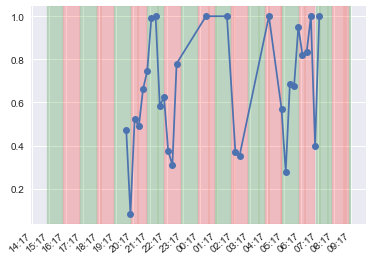

In [99]:
pref_df = pd.read_csv('right_preference', header = None, names = ('time', 'pref'))
pref_df['time'] = pd.to_datetime(pref_df['time'])
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
# ax.plot(activity_df_right)
# ax.scatter(pref_df['time'], pref_df['pref'])
# ax = pref_df.plot.scatter(x='time',y = 'pref')
plt.style.use('seaborn')
plt.plot_date(pref_df['time'], pref_df['pref'], linestyle='solid')
# pref_df.plot(x='time', y='pref', kind='scatter', ax=ax)
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])

In [ ]:
# activity_df_right = activity_df.xs("b'2'", level='feeder') #find only right

In [146]:
activity_df = pd.read_csv('activity_15Min')

In [147]:
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])

In [148]:
activity_df.head()

,time,feeder,activity
0,2019-10-20 15:23:00,b'',89
1,2019-10-20 15:38:00,b'',88
2,2019-10-20 15:53:00,b'',90
3,2019-10-20 16:08:00,b'',89
4,2019-10-20 16:23:00,b'',90


In [121]:
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df = activity_df[is_b2]

In [122]:
right_sec_df.head()

,time,feeder,activity
19,2019-10-20 19:53:00,b'2',89
23,2019-10-20 20:08:00,b'2',1
24,2019-10-20 20:23:00,b'2',74
29,2019-10-20 20:38:00,b'2',66
30,2019-10-20 20:53:00,b'2',84


In [150]:
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df = activity_df[is_b1]

In [151]:
left_sec_df.head()

,time,feeder,activity
18,2019-10-20 19:53:00,b'1',99
22,2019-10-20 20:08:00,b'1',11
26,2019-10-20 20:23:00,b'1',67
28,2019-10-20 20:38:00,b'1',69
32,2019-10-20 20:53:00,b'1',43


<Figure size 720x720 with 0 Axes>

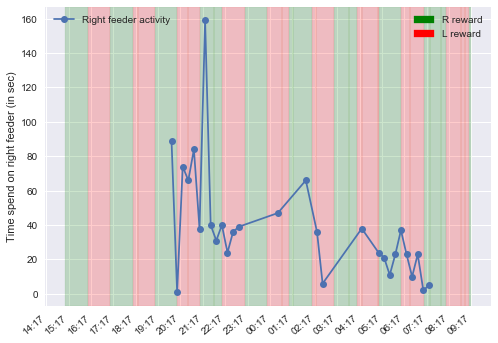

In [139]:

fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df['time'], right_sec_df['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

<Figure size 720x720 with 0 Axes>

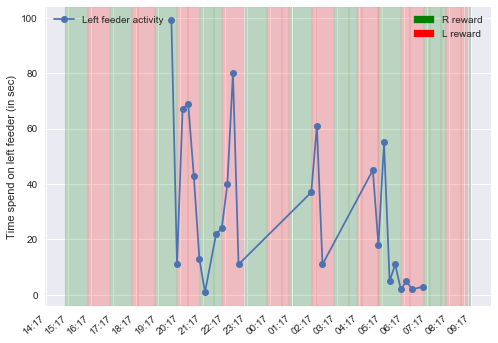

In [152]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
left_activity = plt.plot_date(left_sec_df['time'], left_sec_df['activity'], linestyle='solid', label = 'Left feeder activity')

plt.ylabel('Time spend on left feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Left feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [143]:
activity_df = pd.read_csv('activity_10Min')
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df10 = activity_df[is_b2]
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df10 = activity_df[is_b1]

<Figure size 720x720 with 0 Axes>

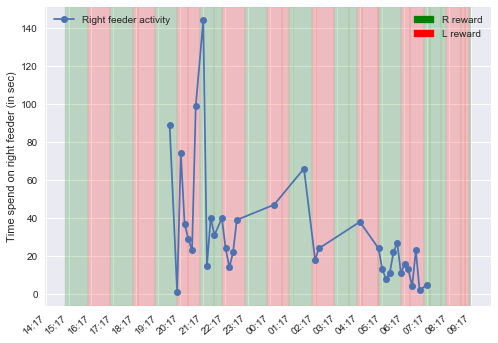

In [145]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df10['time'], right_sec_df10['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [168]:
choices_df_num = pd.read_csv('choices_df_num')
choices_df_num['time'] = pd.to_datetime(choices_df_num['time'])

<Figure size 720x720 with 0 Axes>

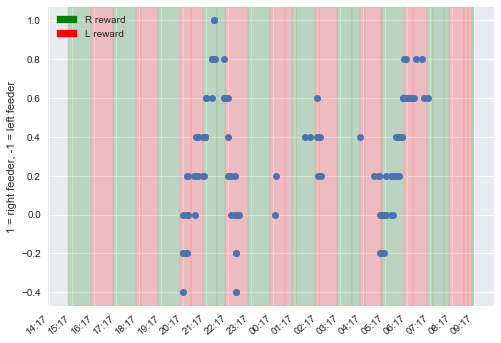

In [172]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'], linestyle='solid')
choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
# act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [163]:
# choices_grouped = choices_df_num.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'